# KNN CLASSIFIER

## 0. Imports

In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics as mt
from matplotlib import pyplot as plt

## 1. Load Datasets

In [2]:
# Train Datasets
dataset_path = '../../datasets/classification/X_training.csv'
x_train = pd.read_csv(dataset_path)
dataset_path2 = '../../datasets/classification/y_training.csv'
y_train = pd.read_csv(dataset_path2)

# Test Datasets
dataset_path3 = '../../datasets/classification/X_test.csv'
x_test = pd.read_csv(dataset_path3)
dataset_path4 = '../../datasets/classification/y_test.csv'
y_test = pd.read_csv(dataset_path4)

# Validation Datasets
dataset_path5 = '../../datasets/classification/X_validation.csv'
x_val = pd.read_csv(dataset_path5)
dataset_path6 = '../../datasets/classification/y_validation.csv'
y_val = pd.read_csv(dataset_path6)

In [3]:
y_train = y_train.values.ravel()
y_val = y_val.values.ravel()
y_test = y_test.values.ravel()

## 2. K-Nearest Neighbors (KNN)

### 2.1 Model Definition and Training

In [4]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train) 

KNeighborsClassifier()

### 2.2 Model Predict and Performance

In [5]:
# Predict Train
y_pred_train = knn.predict(x_train)  

# Performance Metrics
accuracy_train = mt.accuracy_score(y_train, y_pred_train)
precision_train = mt.precision_score(y_train, y_pred_train)
recall_train = mt.recall_score(y_train, y_pred_train)
f1_score_train = mt.f1_score(y_train, y_pred_train)

print(f"Train Accuracy: {accuracy_train}")
print(f"Train Precision: {precision_train}")
print(f"Train Recall: {recall_train}")
print(f"Train F1 Score: {f1_score_train}")

Train Accuracy: 0.7815624353582018
Train Precision: 0.7558933613500558
Train Recall: 0.7325633193330788
Train F1 Score: 0.744045503021685


In [6]:
# Predict Validation
y_pred_val = knn.predict(x_val)

# Performance Metrics
accuracy_val = mt.accuracy_score(y_val, y_pred_val)
precision_val = mt.precision_score(y_val, y_pred_val)
recall_val = mt.recall_score(y_val, y_pred_val)
f1_score_val = mt.f1_score(y_val, y_pred_val)

print(f"Validation Accuracy: {accuracy_val}")
print(f"Validation Precision: {precision_val}")
print(f"Validation Recall: {recall_val}")
print(f"Validation F1 Score: {f1_score_val}")

Validation Accuracy: 0.6756652401943435
Validation Precision: 0.631775410218524
Validation Recall: 0.6031628183235578
Validation F1 Score: 0.6171376481312671


### 2.3 Fine-tuning

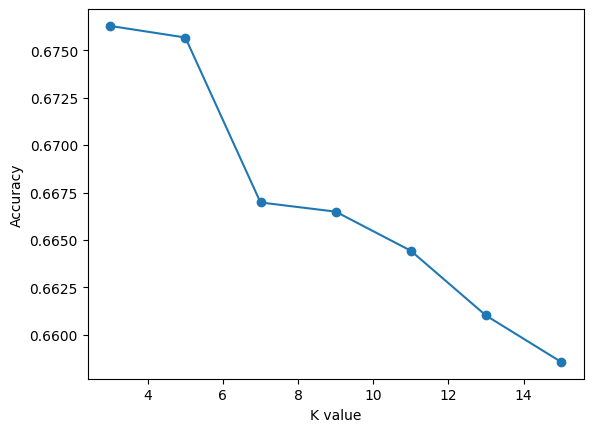

In [7]:
# Find Best KNeighbors Hyperparameter for Validation Data
k = np.arange(3, 17, 2)
accuracy_list = []

for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    y_pred_val = knn.predict(x_val)

    accuracy = mt.accuracy_score(y_val, y_pred_val)
    accuracy_list.append(accuracy)

plt.plot(k, accuracy_list, '-o')
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.show();

In [8]:
best_k = accuracy_list.index(max(accuracy_list))
k[best_k]

3

In [9]:
# Predict Validation with Best KNeighbors Value Found
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train) 
y_pred_val = knn.predict(x_val)

# Performance Metrics
accuracy_val = mt.accuracy_score(y_val, y_pred_val)
precision_val = mt.precision_score(y_val, y_pred_val)
recall_val = mt.recall_score(y_val, y_pred_val)
f1_score_val = mt.f1_score(y_val, y_pred_val)

print(f"Validation Accuracy: {accuracy_val}")
print(f"Validation Precision: {precision_val}")
print(f"Validation Recall: {recall_val}")
print(f"Validation F1 Score: {f1_score_val}")

Validation Accuracy: 0.6762765854757231
Validation Precision: 0.6278511404561825
Validation Recall: 0.6212784913505086
Validation F1 Score: 0.6245475239765645


In [10]:
# Predict Test with Best KNeighbors Value Found
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train) 
y_pred_test = knn.predict(x_test)

# Performance Metrics
accuracy_test = mt.accuracy_score(y_test, y_pred_test)
precision_test = mt.precision_score(y_test, y_pred_test)
recall_test = mt.recall_score(y_test, y_pred_test)
f1_score_test = mt.f1_score(y_test, y_pred_test)

print(f"Test Accuracy: {accuracy_test}")
print(f"Test Precision: {precision_test}")
print(f"Test Recall: {recall_test}")
print(f"Test F1 Score: {f1_score_test}")

Test Accuracy: 0.6722280152937087
Test Precision: 0.6304623753399818
Test Recall: 0.6118785745710514
Test F1 Score: 0.6210314802411252
